In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import databento as db
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import seaborn as sns
import glob


### Batch Download Details

The following data was acquired via a batch download:

| **Field**              | **Value**                                                                 |
|------------------------|---------------------------------------------------------------------------|
| **Dataset**            | `XNAS.ITCH`                                                            |
| **Symbols**            | `AAPL, AMGN, TSLA, JPM, XOM`                                            |
| **Input Symbol Type**  | `raw_symbol`                                                           |
| **Output Symbol Type** | `instrument_id`                                                        |
| **Schema**             | `mbp-10`                                                               |
| **Start Time**         | `2022-06-06T12:00:00.000000000Z`                                        |
| **End Time**           | `2022-06-11T00:00:00.000000000Z`                                        |
| **Limit**              | `None`                                                                 |
| **Encoding**           | `csv`                                                                  |
| **Compression**        | `zstd`                                                                 |
| **Pretty Prices**      | `False`                                                                |
| **Pretty Timestamps**  | `False`                                                                |
| **Map Symbols**        | `False`                                                                |
| **Split Symbols**      | `False`                                                                |
| **Split Duration**     | `day`                                                                  |
| **Split Size**         | `None`                                                                 |
| **Packaging**          | `None`                                                                 |
| **Delivery Method**    | `download`                                                             |
| **Record Count**       | `36,621,749`                                                           |
| **Billed Size**        | `13,476,803,632 bytes`                                                 |
| **Actual Size**        | `1,492,818,985 bytes`                                                  |
| **Package Size**       | `1,492,828,262 bytes`                                                  |
| **State**              | `done`                                                                 |
| **Received Timestamp** | `2025-01-06T08:17:56.256384000Z`                                        |
| **Queued Timestamp**   | `2025-01-06T08:17:57.442805000Z`                                        |
| **Processing Start**   | `2025-01-06T08:18:11.582045000Z`                                        |
| **Processing End**     | `2025-01-06T08:19:34.766960000Z`                                        |
| **Expiration**         | `2025-02-05T08:19:34.766960000Z`                                        |
| **Progress**           | `100%`                                                                 |


In [8]:
# client = db.Historical("db-9DBV6RRuX9rGuDH55M6VgiH7qwVm6")

# jobs = client.batch.list_jobs(
#     states=["queued", "processing", "done"],
#     since="2022-06-01",
# )
# print(jobs)


In [9]:
raw_df = pd.read_csv("PATH FILE TO CSV DATA") #only one days data
print(raw_df)


                     ts_recv             ts_event  rtype  publisher_id  \
0        1654516800049192003  1654516800049178580     10             2   
1        1654516800049192003  1654516800049178580     10             2   
2        1654516800049192003  1654516800049178580     10             2   
3        1654516800049213171  1654516800049202946     10             2   
4        1654516800049494773  1654516800049484461     10             2   
...                      ...                  ...    ...           ...   
7423432  1654559999879355117  1654559999879342473     10             2   
7423433  1654559999881447151  1654559999881435110     10             2   
7423434  1654559999881447151  1654559999881435110     10             2   
7423435  1654559999885495096  1654559999885482740     10             2   
7423436  1654559999885495096  1654559999885482740     10             2   

         instrument_id action side  depth         price  size  ...  bid_sz_08  \
0                   27      T 

In [10]:
#removing all unused cols
df = raw_df.drop(columns=['bid_sz_05', 'ask_sz_05', 'bid_ct_05', 'ask_ct_05',
       'bid_sz_06', 'ask_sz_06', 'bid_ct_06', 'ask_ct_06', 'bid_sz_07',
       'ask_sz_07', 'bid_ct_07', 'ask_ct_07', 'bid_sz_08', 'ask_sz_08',
       'bid_ct_08', 'ask_ct_08', 'bid_sz_09', 'ask_sz_09', 'bid_ct_09',
       'ask_ct_09', 'bid_px_05', 'ask_px_05', 'bid_px_06', 'ask_px_06', 'bid_px_07', 'ask_px_07', 'bid_px_08', 'ask_px_08', 'bid_px_09', 'ask_px_09'])

#keeping only ask and bid events
df = df[df['side'].isin(['B', 'A'])].reset_index(drop=True)

In [11]:
print(df.columns)

Index(['ts_recv', 'ts_event', 'rtype', 'publisher_id', 'instrument_id',
       'action', 'side', 'depth', 'price', 'size', 'flags', 'ts_in_delta',
       'sequence', 'bid_px_00', 'ask_px_00', 'bid_sz_00', 'ask_sz_00',
       'bid_ct_00', 'ask_ct_00', 'bid_px_01', 'ask_px_01', 'bid_sz_01',
       'ask_sz_01', 'bid_ct_01', 'ask_ct_01', 'bid_px_02', 'ask_px_02',
       'bid_sz_02', 'ask_sz_02', 'bid_ct_02', 'ask_ct_02', 'bid_px_03',
       'ask_px_03', 'bid_sz_03', 'ask_sz_03', 'bid_ct_03', 'ask_ct_03',
       'bid_px_04', 'ask_px_04', 'bid_sz_04', 'ask_sz_04', 'bid_ct_04',
       'ask_ct_04'],
      dtype='object')


In [12]:
#rescaling all price cols
price_columns = [col for col in df.columns if 'price' in col or 'bid_px' in col or 'ask_px' in col]
df[price_columns] = df[price_columns] * 1e-9
print(df.head)


<bound method NDFrame.head of                     ts_recv             ts_event  rtype  publisher_id  \
0       1654516800049192003  1654516800049178580     10             2   
1       1654516800421218514  1654516800421206799     10             2   
2       1654516800491706244  1654516800491695092     10             2   
3       1654516800659557893  1654516800659546249     10             2   
4       1654516801572986952  1654516801572975972     10             2   
...                     ...                  ...    ...           ...   
249435  1654559982976375289  1654559982976363075     10             2   
249436  1654559982976393930  1654559982976382777     10             2   
249437  1654559999879355117  1654559999879342473     10             2   
249438  1654559999881447151  1654559999881435110     10             2   
249439  1654559999885495096  1654559999885482740     10             2   

        instrument_id action side  depth   price  size  ...  bid_sz_03  \
0                  

In [13]:
def calc_level_ofi(df, level=0):
    """
    Compute multi-level OFI for a certain level
    """
    df = df.sort_values(by=['instrument_id', 'ts_event']).reset_index(drop=True)
    group = df.groupby('instrument_id')
    
    bid_px = df[f'bid_px_{level:02d}']
    bid_sz = df[f'bid_sz_{level:02d}']
    ask_px = df[f'ask_px_{level:02d}']
    ask_sz = df[f'ask_sz_{level:02d}']
    
    shifted_bid_px = group[f'bid_px_{level:02d}'].shift(1)
    shifted_bid_sz = group[f'bid_sz_{level:02d}'].shift(1)
    shifted_ask_px = group[f'ask_px_{level:02d}'].shift(1)
    shifted_ask_sz = group[f'ask_sz_{level:02d}'].shift(1)
    

    of_bid = np.where(bid_px > shifted_bid_px, bid_sz,
                      np.where(bid_px < shifted_bid_px, -bid_sz,
                               bid_sz - shifted_bid_sz))
    
    of_ask = np.where(ask_px > shifted_ask_px, -ask_sz,
                      np.where(ask_px < shifted_ask_px, ask_sz,
                               ask_sz - shifted_ask_sz))
    
    df[f'ofi_{level}'] = of_bid - of_ask
    return df

def calc_ofi_for_levels(df, levels=5):
    """
    Compute multi-level OFI for levels upto levels
    """
    df_out = df.copy()
    for l in range(levels):
        df_out = calc_level_ofi(df_out, level=l)
    return df_out

df = calc_ofi_for_levels(df, levels=5)


In [14]:
print(df.head())

               ts_recv             ts_event  rtype  publisher_id  \
0  1654516800049192003  1654516800049178580     10             2   
1  1654516800659557893  1654516800659546249     10             2   
2  1654516815555812649  1654516815555800635     10             2   
3  1654516815555812649  1654516815555800635     10             2   
4  1654516816997265301  1654516816997254005     10             2   

   instrument_id action side  depth   price  size  ...  ask_px_04  bid_sz_04  \
0             27      T    B      0  147.45     2  ...     147.51          1   
1             27      T    B      0  147.44   100  ...     147.51          1   
2             27      T    A      0  147.41   100  ...     147.50          4   
3             27      T    A      0  147.41    80  ...     147.50          4   
4             27      T    A      0  147.41    19  ...     147.50          4   

   ask_sz_04  bid_ct_04  ask_ct_04  ofi_0  ofi_1  ofi_2  ofi_3  ofi_4  
0         25          1          1    

In [15]:
def calculate_lagged_ofi(df):
    """
    Compute lagged ofi, shift by a single event
    """
    df['ofi_lagged'] = df.groupby('instrument_id')['ofi_pca'].shift(1)
    return df

In [16]:
def assign_minute_bucket(df):
    """
    Assign each event to a 1-minute bucket,
    and compute the mid-price at each event.
    """
    df['datetime'] = pd.to_datetime(df['ts_event'], unit='ns')
    df['minute'] = df['datetime'].dt.floor('T')
    df['mid_price'] = (df['bid_px_00'] + df['ask_px_00']) / 2
    return df

def aggregate_ofi_minute_with_scaling(df, levels=5):
    """
    Aggregate data over 1-minute intervals, scale OFI by average depth, 
    and compute integrated OFI using PCA.
    """
        
    #define aggregation: sum OFI and sizes, count events, and get last mid_price
    agg_dict = {'mid_price': 'last', 'ts_event': 'count'}
    for l in range(levels):
        agg_dict[f'ofi_{l}'] = 'sum'
        agg_dict[f'bid_sz_{l:02d}'] = 'sum'
        agg_dict[f'ask_sz_{l:02d}'] = 'sum'
        
    grouped = df.groupby(['instrument_id', 'minute']).agg(agg_dict).reset_index()
    
    #compute average size and scale OFI for each level
    for l in range(levels):
        bid_sum = grouped[f'bid_sz_{l:02d}']
        ask_sum = grouped[f'ask_sz_{l:02d}']
        N = grouped['ts_event']  # count of events in the minute
        grouped[f'avg_size_{l}'] = (bid_sum + ask_sum) / (2 * N.replace(0, np.nan))
    
    #compute QM as the average over levels
    avg_sizes = [grouped[f'avg_size_{l}'] for l in range(levels)]
    grouped['QM'] = np.mean(np.column_stack(avg_sizes), axis=1)
    
    #scale OFI for each level using QM
    for l in range(levels):
        grouped[f'scaled_ofi_{l}'] = grouped[f'ofi_{l}'] / grouped['QM']
    
    #compute integrated OFI using PCA on scaled OFI columns
    ofi_cols = [f'scaled_ofi_{l}' for l in range(levels)]
    df_for_pca = grouped.dropna(subset=ofi_cols)
    pca = PCA(n_components=1)
    pca.fit(df_for_pca[ofi_cols])
    #explained_variance = pca.explained_variance_ratio_[0]
    explained_variance = pca.explained_variance_ratio_[0]
    print(f"Variance explained by the first principal component: {explained_variance:.2%}")
    
    w1 = pca.components_[0]
    l1_norm = np.sum(np.abs(w1))
    w1_normalized = w1 / l1_norm
    w11 = w1_normalized[0] if w1_normalized[0] != 0 else 1.0
    df_for_pca['ofi_pca'] = df_for_pca[ofi_cols].dot(w1_normalized) / w11
    
    return df_for_pca


In [17]:
def compute_future_price_changes(aggregated_df, horizons=[1,5]):
    """
    Compute price change metrisc
    """
    
    aggregated_df = aggregated_df.sort_values(['instrument_id', 'minute']).copy()
    
    aggregated_df['price_change'] = aggregated_df.groupby('instrument_id')['mid_price'].diff()
    
    aggregated_df['log_return'] = np.log(
        aggregated_df['mid_price'] / aggregated_df.groupby('instrument_id')['mid_price'].shift(1)
    )
    
    for horizon in horizons:
        price_col_name = f'future_price_change_{horizon}m'
        log_col_name = f'future_log_return_{horizon}m'
        
        aggregated_df[price_col_name] = (
            aggregated_df.groupby('instrument_id')['mid_price']
            .shift(-horizon) - aggregated_df['mid_price']
        )
        
        aggregated_df[log_col_name] = np.log(
            aggregated_df.groupby('instrument_id')['mid_price'].shift(-horizon) / aggregated_df['mid_price']
        )
    
    return aggregated_df

In [18]:
def clean(df):
    """
    clean data by removing nan and inf values
    """
    wanted = ['log_return', 'price_change', "ofi_pca", "ofi_lagged", "future_price_change_5m", "future_price_change_1m"]
    existing_columns = [col for col in wanted if col in df.columns]
    
    columns_to_drop = [col for col in df.columns if 'ask' in col or 'bid' in col]
    cleaned = df.drop(columns=columns_to_drop)
    
    cleaned[existing_columns] = cleaned[existing_columns].replace([np.inf, -np.inf], np.nan)
    cleaned = cleaned.dropna(subset=existing_columns)
    
    return cleaned


In [19]:
df = assign_minute_bucket(df)

aggregated_df = aggregate_ofi_minute_with_scaling(df, levels=5)

aggregated_df = compute_future_price_changes(aggregated_df, horizons=[1,5])

aggregated_df = calculate_lagged_ofi(aggregated_df)

aggregated_df = clean(aggregated_df)

print(aggregated_df)

print(aggregated_df.columns)


Variance explained by the first principal component: 77.13%
      instrument_id              minute  mid_price  ts_event   ofi_0   ofi_1  \
1                27 2022-06-06 12:01:00    147.380         1   501.0     0.0   
2                27 2022-06-06 12:03:00    147.330        11 -1728.0 -1510.0   
3                27 2022-06-06 12:04:00    147.300         9  -442.0  -882.0   
4                27 2022-06-06 12:05:00    147.290         2  -118.0  -600.0   
5                27 2022-06-06 12:06:00    147.335        17   492.0  -498.0   
...             ...                 ...        ...       ...     ...     ...   
2470          12015 2022-06-06 20:42:00     99.175         1    -5.0     0.0   
2471          12015 2022-06-06 20:52:00     98.795         1  -101.0  -113.0   
2472          12015 2022-06-06 21:19:00     99.345         1   101.0   701.0   
2473          12015 2022-06-06 21:25:00     99.360         1   500.0     1.0   
2474          12015 2022-06-06 21:26:00     99.360        18

C:\Users\johai\AppData\Local\Temp\ipykernel_23204\2716911666.py:7: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df['minute'] = df['datetime'].dt.floor('T')


In [20]:
def regression(data, y, x):
    df = data[[y] + x].copy()
    X = sm.add_constant(df[x])
    Y = df[y]
    model = sm.OLS(Y, X).fit()
    return model

In [25]:
contemp_model = regression(aggregated_df, 'price_change', ['scaled_ofi_1'])
if contemp_model:
    print("Contemporaneous Model for Price Changes:")
    print(contemp_model.summary())

contemp_model = regression(aggregated_df, 'price_change', ['ofi_pca'])
if contemp_model:
    print("Contemporaneous Model for Price Changes:")
    print(contemp_model.summary())

contemp_model2 = regression(aggregated_df, 'log_return', ['ofi_pca'])
if contemp_model:
    print("Contemporaneous Model for Log Returns:")
    print(contemp_model2.summary())

contemp_model_predict = regression(aggregated_df, 'future_log_return_1m', ['ofi_pca'])
if contemp_model_predict:
    print("Model for Future Log Returns in 1 minute Horizon:")
    print(contemp_model_predict.summary())
contemp_model_predict = regression(aggregated_df, 'future_price_change_5m', ['ofi_pca'])
if contemp_model_predict:
    print("Model for Future Log Returns in 5 minute Horizon:")
    print(contemp_model_predict.summary())

Contemporaneous Model for Price Changes:
                            OLS Regression Results                            
Dep. Variable:           price_change   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     1412.
Date:                Thu, 09 Jan 2025   Prob (F-statistic):          2.09e-244
Time:                        12:43:04   Log-Likelihood:                -1095.8
No. Observations:                2450   AIC:                             2196.
Df Residuals:                    2448   BIC:                             2207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const  

In [22]:
def cross_impact_analysis(data):

    ids = data["instrument_id"].unique()
    
    impact_matrix = pd.DataFrame(index=ids, columns=ids, dtype=float)
    
    ofi_data = {sym: data[data["instrument_id"] == sym]['ofi_pca'].values for sym in ids}
    price_data = {sym: data[data["instrument_id"] == sym]['price_change'].values for sym in ids}
    
    for id in ids:
        ofi1 = ofi_data[id]
        for id2 in ids:
            ofi2 = price_data[id2]
            min_len = min(len(ofi1), len(ofi2))
            corr = np.corrcoef(ofi1[:min_len], ofi2[:min_len])[0, 1]
            impact_matrix.at[id, id2] = corr if np.isfinite(corr) else np.nan

    return impact_matrix

def visualize_heatmap(correlation_matrix, title='Cross-Impact Correlation Matrix'):

    plt.figure(figsize=(10, 8)) 
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                linewidths=0.5, linecolor='white', fmt=".2f")
    plt.title(title)
    plt.ylabel('OFI')
    plt.xlabel('Price Change')
    plt.show()

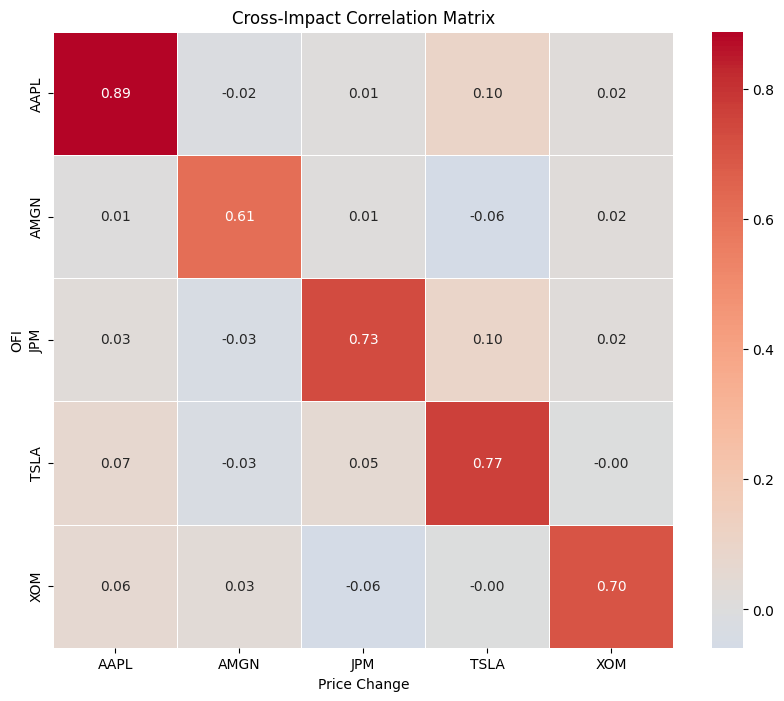

In [24]:

symbology_df = pd.read_csv("C:/Users/johai/Desktop/Cross-impact of order flow imbalance in equity markets/data/symbology.csv")

mapping_dict = symbology_df.set_index('instrument_id')['raw_symbol'].to_dict()

impact_matrix = cross_impact_analysis(aggregated_df)

impact_matrix.rename(index=mapping_dict, columns=mapping_dict, inplace=True)

visualize_heatmap(impact_matrix)


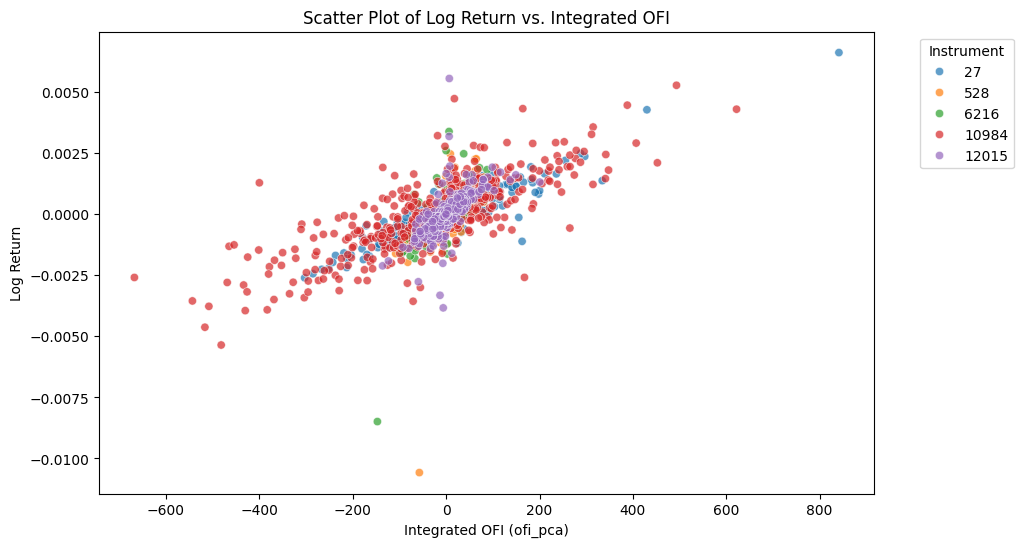

In [56]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=aggregated_df, x='ofi_pca', y='log_return', hue='instrument_id', palette='tab10', alpha=0.7)
plt.title("Scatter Plot of Log Return vs. Integrated OFI")
plt.xlabel("Integrated OFI (ofi_pca)")
plt.ylabel("Log Return")
plt.legend(title='Instrument', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

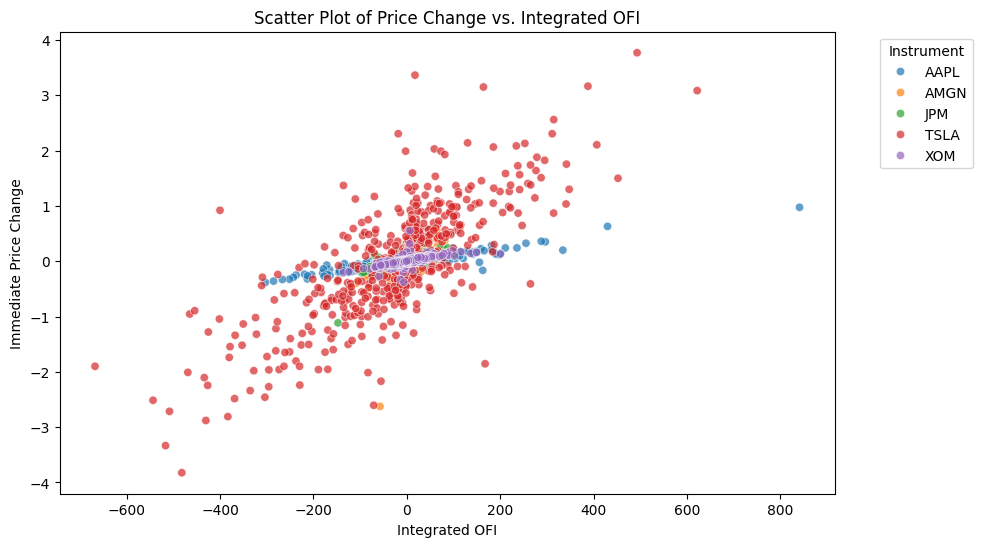

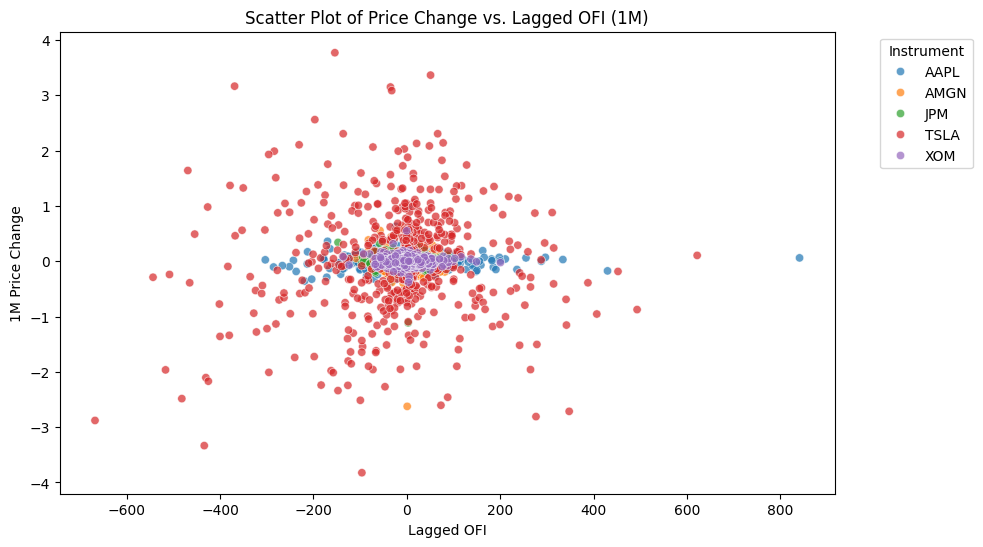

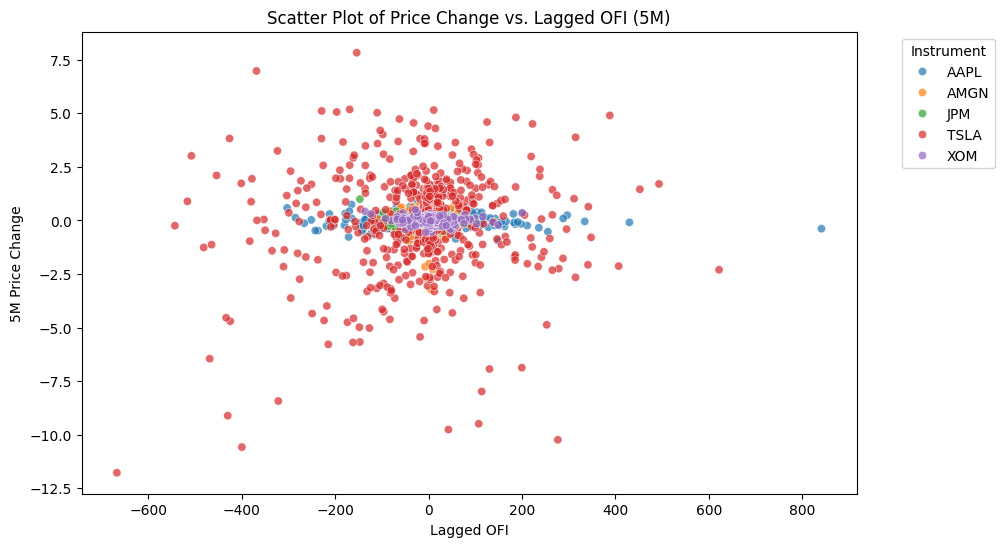

In [57]:
# Load symbology data
symbology_df = pd.read_csv("PATH FILE TO SYMBOLOGY CSV")

# Create a mapping dictionary from instrument_id to raw_symbol
mapping_dict = symbology_df.set_index('instrument_id')['raw_symbol'].to_dict()

# Map instrument_id in the aggregated_df to raw_symbol
aggregated_df['raw_symbol'] = aggregated_df['instrument_id'].map(mapping_dict)

# Plot 1: Scatter Plot of Price Change vs. Integrated OFI
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=aggregated_df, 
    x='ofi_pca', 
    y='price_change', 
    hue='raw_symbol',  # Use raw_symbol instead of instrument_id
    palette='tab10', 
    alpha=0.7
)
plt.title("Scatter Plot of Price Change vs. Integrated OFI")
plt.xlabel("Integrated OFI")
plt.ylabel("Immediate Price Change")
plt.legend(title='Instrument', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

# Plot 2: Scatter Plot of Price Change vs. Lagged OFI (1M Price Change)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=aggregated_df, 
    x='ofi_lagged', 
    y='future_price_change_1m', 
    hue='raw_symbol',  # Use raw_symbol instead of instrument_id
    palette='tab10', 
    alpha=0.7
)
plt.title("Scatter Plot of Price Change vs. Lagged OFI (1M)")
plt.xlabel("Lagged OFI")
plt.ylabel("1M Price Change")
plt.legend(title='Instrument', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plot 3: Scatter Plot of Price Change vs. Lagged OFI (5M Price Change)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=aggregated_df, 
    x='ofi_lagged', 
    y='future_price_change_5m', 
    hue='raw_symbol',  # Use raw_symbol instead of instrument_id
    palette='tab10', 
    alpha=0.7
)
plt.title("Scatter Plot of Price Change vs. Lagged OFI (5M)")
plt.xlabel("Lagged OFI")
plt.ylabel("5M Price Change")
plt.legend(title='Instrument', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


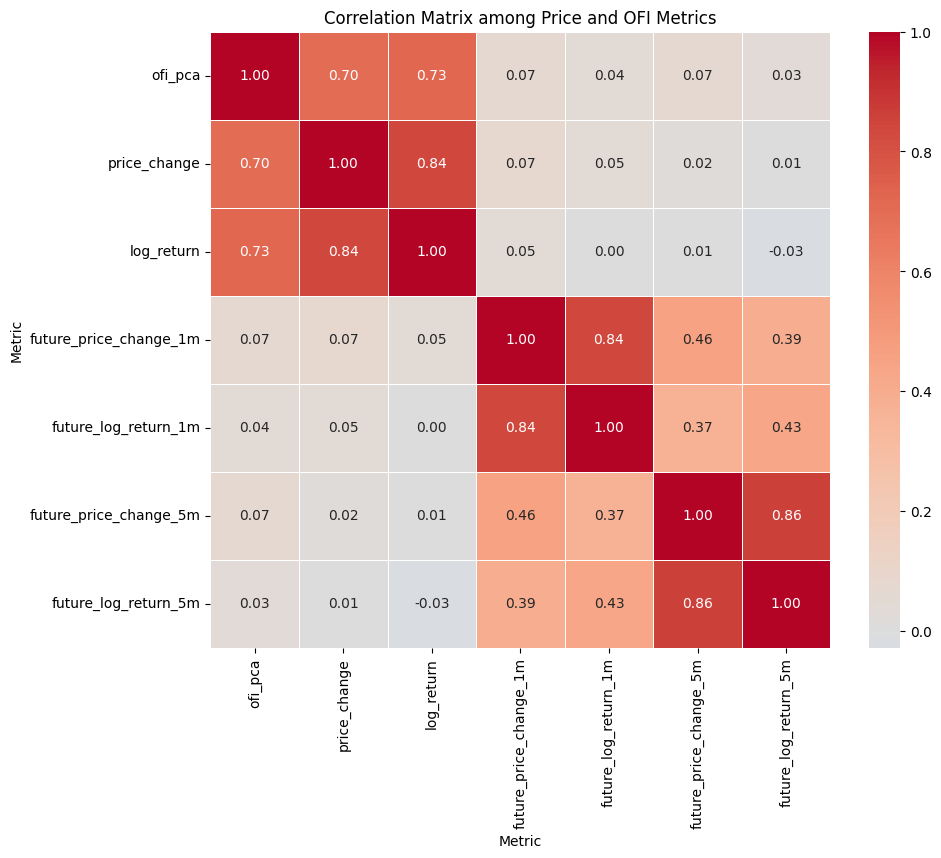

In [58]:
# Select relevant columns for correlation analysis
cols = [
    'ofi_pca', 'price_change', 'log_return', 
    'future_price_change_1m', 'future_log_return_1m', 
    'future_price_change_5m', 'future_log_return_5m'
]

# Compute correlation matrix
corr_matrix = aggregated_df[cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f",
            linewidths=0.5, linecolor='white')
plt.title("Correlation Matrix among Price and OFI Metrics")
plt.ylabel("Metric")
plt.xlabel("Metric")

plt.show()

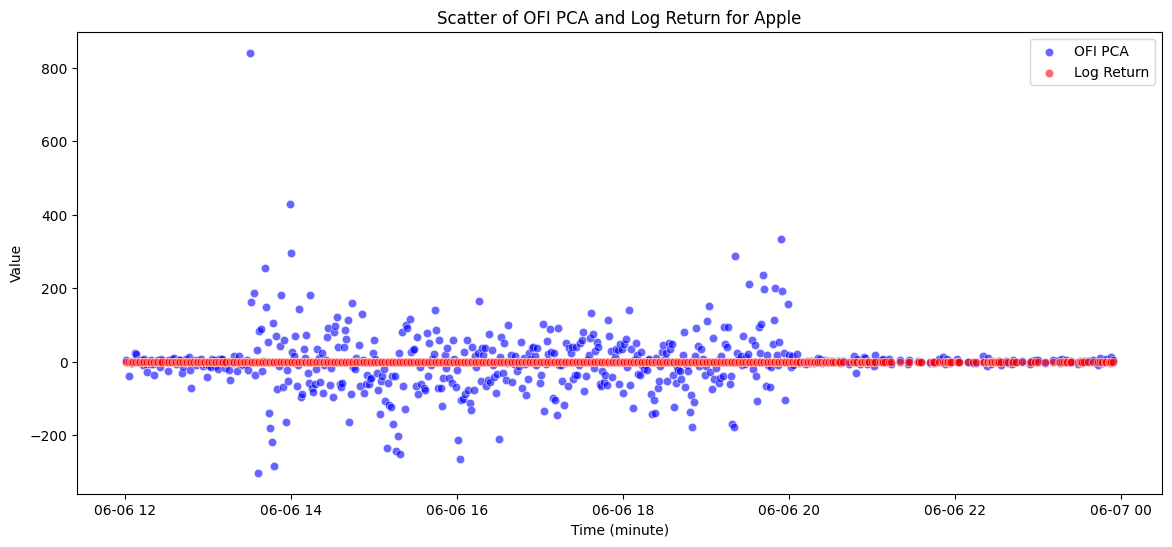

In [59]:
subset = aggregated_df[aggregated_df['instrument_id'] == 27] #apple = 27

plt.figure(figsize=(14, 6))
sns.scatterplot(x='minute', y='ofi_pca', data=subset, label='OFI PCA', color='blue', alpha=0.6)
sns.scatterplot(x='minute', y='log_return', data=subset, label='Log Return', color='red', alpha=0.6)
plt.title(f"Scatter of OFI PCA and Log Return for Apple")
plt.xlabel("Time (minute)")
plt.ylabel("Value")
plt.legend()

plt.show()

In [60]:
print(aggregated_df)

      instrument_id              minute  mid_price  ts_event   ofi_0   ofi_1  \
1                27 2022-06-06 12:01:00    147.380         1   501.0     0.0   
2                27 2022-06-06 12:03:00    147.330        11 -1728.0 -1510.0   
3                27 2022-06-06 12:04:00    147.300         9  -442.0  -882.0   
4                27 2022-06-06 12:05:00    147.290         2  -118.0  -600.0   
5                27 2022-06-06 12:06:00    147.335        17   492.0  -498.0   
...             ...                 ...        ...       ...     ...     ...   
2470          12015 2022-06-06 20:42:00     99.175         1    -5.0     0.0   
2471          12015 2022-06-06 20:52:00     98.795         1  -101.0  -113.0   
2472          12015 2022-06-06 21:19:00     99.345         1   101.0   701.0   
2473          12015 2022-06-06 21:25:00     99.360         1   500.0     1.0   
2474          12015 2022-06-06 21:26:00     99.360        18   -17.0    -1.0   

       ofi_2  ofi_3   ofi_4  avg_size_0

In [61]:
def predict_price_change_with_lasso(aggregated_df, target_instrument, cv=5, random_state=0):
    """
    Predicts price change of a target instrument using LASSO regression.
    """
    ofi_pivot = aggregated_df.pivot(index='minute', columns='instrument_id', values='ofi_pca')
    
    target_data = aggregated_df.loc[aggregated_df['instrument_id'] == target_instrument, ['minute', 'price_change']]
    data_merged = ofi_pivot.join(target_data.set_index('minute'), how='inner').dropna()

    X, y = data_merged.drop(columns='price_change'), data_merged['price_change']

    lasso = LassoCV(cv=cv, random_state=random_state).fit(X, y)

    coef = pd.Series(lasso.coef_, index=X.columns)[lambda x: x != 0]

    return coef, lasso.intercept_, lasso.score(X, y)


non_zero_coefs, intercept, r2_score = predict_price_change_with_lasso(aggregated_df, target_instrument=27)

print("Non-zero coefficients:")
print(non_zero_coefs)
print("\nIntercept:", intercept)
print("R² on training data:", r2_score)


Non-zero coefficients:
27       0.001070
10984    0.000078
12015    0.000023
dtype: float64

Intercept: 0.0033985086839844027
R² on training data: 0.8467821878446998
